## Descrição

Neste notebook irei comparar a distribuição dos estimadores de uma regressão linear a partir de duas abordagens distintas. A primeira consiste em considerar somente uma amostra com $n$ observações e deduzir expressões para $\hat\beta_0$ e $\hat\beta_1$ sob certas premissas. Ja a segunda não se apoiará em nenhuma premissa e, portanto, não fornece uma expressão fechada para obtenção dos coeficientes. Essa ultima abordagem consiste em realizar $m$ amostras de tamanho $n$ e usar o teorema central do limite.

## Importações e configurações do ambiente

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
%config InlineBackend.figure_format = 'retina'

## Sintetizando dados

In [2]:
np.random.seed(42)  # Consistência na reprodutibilidade

# Parâmetros da população
n_pop = 1000
b0    = 5
b1    = 2
desvio_erro  = 3

# Gerando os dados da população
X_pop = np.random.uniform(0, 10, n_pop)
erro  = np.random.normal(0, desvio_erro, n_pop)
y_pop = b0 + b1 * X_pop + erro

# Organizando em um DataFrame
populacao = pd.DataFrame({
    'X': X_pop,
    'Y': y_pop
})

### Visualizando os dados da população num gráfico de dispersão

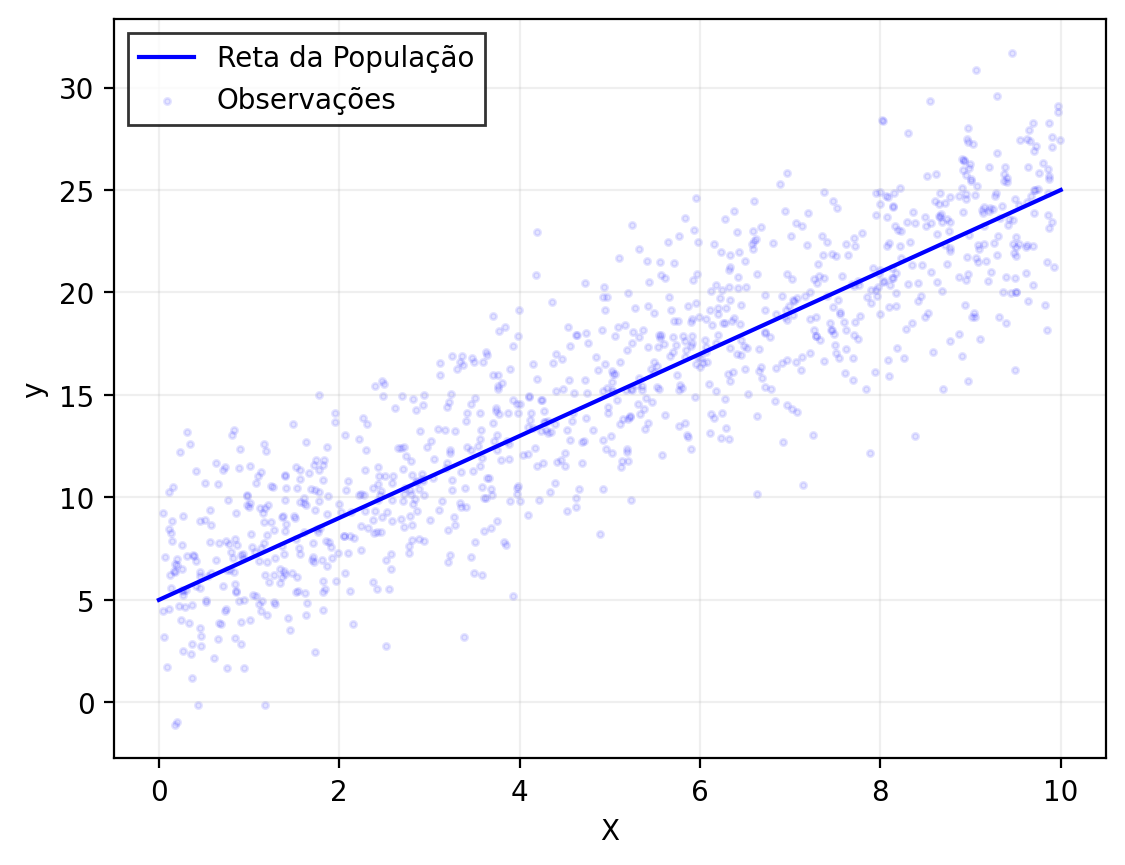

In [3]:
# Criando os valores sem erro para exibir a reta da população
X_reta = np.linspace(0, 10, 100)
y_reta = b0 + b1 * X_reta

# Adicionando a reta da população
plt.plot(X_reta, y_reta, color="blue", label="Reta da População")  # Linha adicionada
plt.scatter(populacao['X'], populacao['Y'], alpha=0.1, s=5, label="Observações", color="blue")

plt.xlabel("X")
plt.ylabel("y")
plt.grid(alpha=0.2)
plt.legend(fancybox=False, edgecolor='k')
plt.show()

## 1. Amostragem única ($n$ observações)
Vamos deduzir as expressões que nos permitem encontrar os estimadores dos coeficientes da regressão

In [4]:
n = 50  # Tamanho da amostra

# Amostrando da população
amostra = populacao.sample(n, random_state=42)
X_amostra = amostra['X'].values
y_amostra = amostra['Y'].values

$$
\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\varepsilon}
$$

onde:
- $ \mathbf{y} \in \mathbb{R}^{n \times 1} $ é o vetor de observações da variável dependente,
- $ \mathbf{X} \in \mathbb{R}^{n \times 2} $ é a matriz de design, composta por uma coluna de 1s (termo de intercepto) e pela variável independente $ x $,
- $ \boldsymbol{\beta} \in \mathbb{R}^{2 \times 1} $ é o vetor de coeficientes $ \beta_0 $ e $ \beta_1 $,
- $ \boldsymbol{\varepsilon} \in \mathbb{R}^{n \times 1} $ é o vetor de termos de erro.

A matriz de design $ \mathbf{X} $ tem a seguinte forma:

$$
\mathbf{X} = 
\begin{bmatrix}
1 & x_1 \\\\
1 & x_2 \\\\
\vdots & \vdots \\\\
1 & x_n
\end{bmatrix}
$$

In [5]:
# Adicionando o termo de viés (coluna de 1s) à matriz X
X_vies = np.vstack([np.ones(n), X_amostra]).T

### Estimativa dos Coeficientes $ \boldsymbol{\beta} $

Para encontrar os coeficientes $ \boldsymbol{\beta} $, minimizamos a soma dos quadrados dos resíduos $ S(\boldsymbol{\beta}) $:

$$
S(\boldsymbol{\beta}) = (\mathbf{y} - \mathbf{X}\boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X}\boldsymbol{\beta})
$$

Derivando $ S(\boldsymbol{\beta}) $ em relação a $ \boldsymbol{\beta} $ e igualando a zero, obtemos:

$$
\frac{\partial S(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}} = -2\mathbf{X}^\top (\mathbf{y} - \mathbf{X}\boldsymbol{\beta}) = 0
$$

$$
\mathbf{X}^\top \mathbf{y} = \mathbf{X}^\top \mathbf{X}\boldsymbol{\beta}
$$

Resolvendo para $ \boldsymbol{\beta} $, temos:

$$
\boldsymbol{\hat{\beta}} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$

In [7]:
# Calculando os coeficientes estimados
beta_est = np.linalg.inv(X_vies.T @ X_vies) @ X_vies.T @ y_amostra

In [9]:
print("Coeficientes estimados:\n", beta_est)

Coeficientes estimados:
 [4.95372385 2.04466697]


### Variância dos Estimadores

A variância dos estimadores $ \boldsymbol{\hat{\beta}} $ é dada por:

$$
\text{Var}(\boldsymbol{\hat{\beta}}) = \sigma^2 (\mathbf{X}^\top \mathbf{X})^{-1}
$$

Como $ \sigma^2 $ é desconhecida, usamos uma estimativa baseada nos resíduos:

$$
\hat{\sigma}^2 = \frac{\sum (y_i - \hat{y}_i)^2}{n - p - 1}
$$

In [10]:
# Calculando o erro padrão
y_pred = X_vies @ beta_est
residuos = y_amostra - y_pred
desvio_est = np.sqrt(np.sum(residuos**2) / (n - 2))

Portanto, o erro padrão dos coeficientes é:

$$
\text{Erro Padrão}(\boldsymbol{\hat{\beta}}_j) = \sqrt{\hat{\sigma}^2 [(\mathbf{X}^\top \mathbf{X})^{-1}]_{jj}}
$$

In [11]:
var_beta_est = desvio_est**2 * np.linalg.inv(X_vies.T @ X_vies)
erro_padrao = np.sqrt(np.diag(var_beta_est))

In [12]:
print("Erro padrão dos coeficientes:\n", erro_padrao)

Erro padrão dos coeficientes:
 [0.82543431 0.14824159]


Daqui, podemos armazenar essas informações num dataframe para facilitar comparações futuras

In [23]:
b0_latex,b1_latex = r'$\hat\beta_0$', r'$\hat\beta_1$'
SE_b0_latex, SE_b1_latex = r'$\text{SE}\hat\beta_0$', r'$\text{SE}\hat\beta_1$'

In [26]:
coeficientes = pd.DataFrame({
                            b0_latex: beta_est[0], 
                            SE_b0_latex:erro_padrao[0], 
                            b1_latex: beta_est[1],
                            SE_b1_latex:erro_padrao[1]}, 
                            index=['Amostragem simples'])

Sob a suposição de um erro distribuição normal, sabemos que $\hat\beta_0$ e $\hat\beta_1$ também possuirão uma distribuição normal.

In [27]:
from scipy.stats import norm

In [28]:
b0_pontos = np.linspace(beta_est[0] - 4*erro_padrao[0], beta_est[0] + 4*erro_padrao[0], 1000)
b1_pontos = np.linspace(beta_est[1] - 4*erro_padrao[1], beta_est[1] + 4*erro_padrao[1], 1000)

pdf_b0 = norm.pdf(b0_pontos, loc=beta_est[0], scale=erro_padrao[0])             # Cálculo da PDF
pdf_b1 = norm.pdf(b1_pontos, loc=beta_est[1], scale=erro_padrao[1])             # Cálculo da PDF

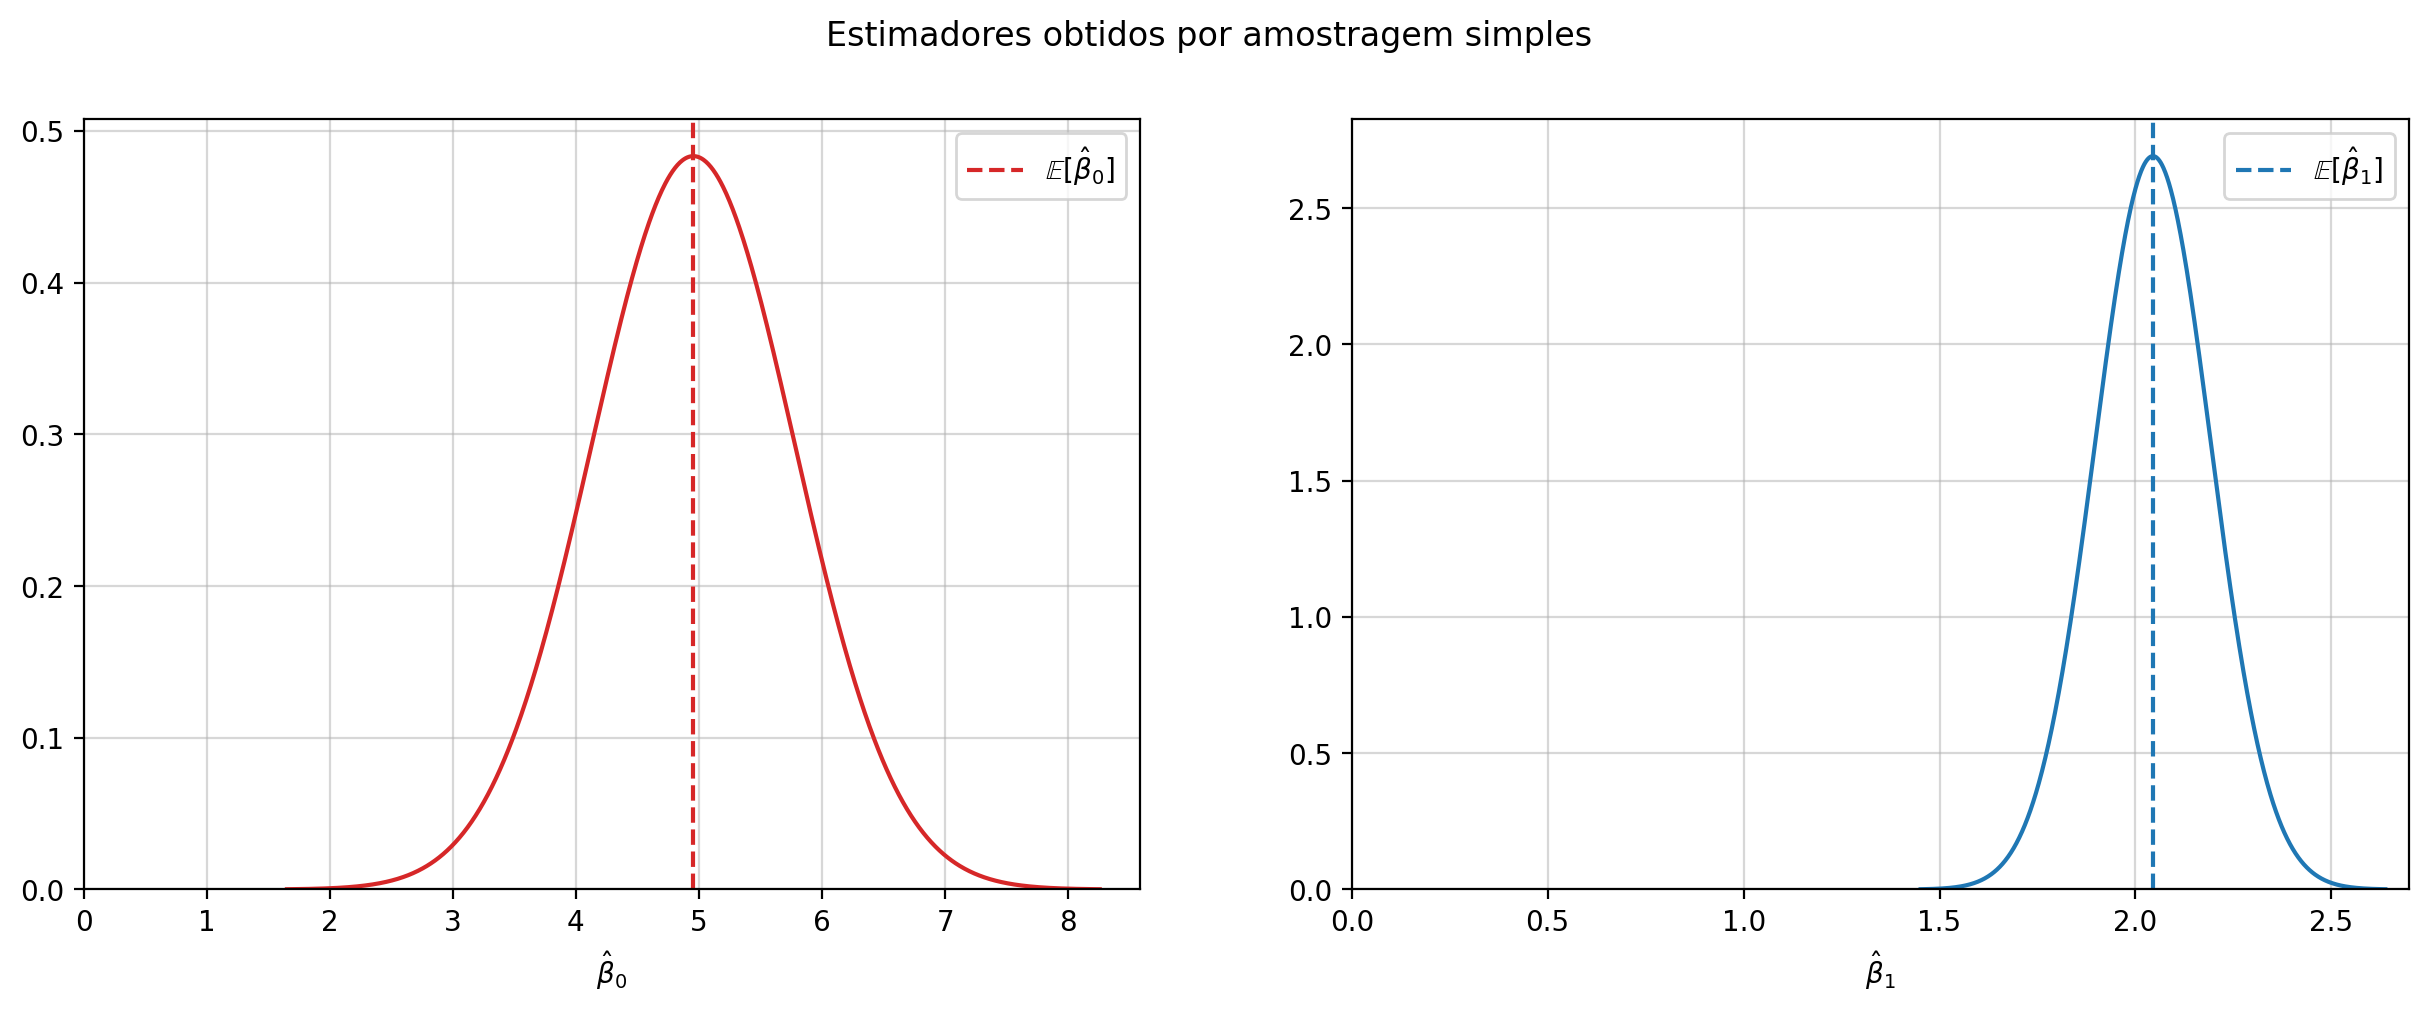

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plt.suptitle('Estimadores obtidos por amostragem simples')
for ax, b, pdf, beta_hat_value, label, cores in zip(
    axes, [b0_pontos, b1_pontos], [pdf_b0, pdf_b1], beta_est, [r'$\hat\beta_0$', r'$\hat\beta_1$'],['tab:red','tab:blue']):
    ax.plot(b, pdf,color=cores)
    ax.axvline(x=beta_hat_value, ls='--', label=r'$\mathbb{E} [$' + label + ']',color=cores)
    ax.set_xlabel(label)
    ax.grid(alpha=0.5)
    ax.set_ylim(0,)
    ax.set_xlim(0,)
    ax.legend()

## 2. Amostragem multipla ($n$ observações)
Nesse caso, para cada amostra realizamos a estimativa de $ \hat\beta_0^{(i)} $ e $ \hat\beta_1^{(i)} $ e depois calculamos a média dessas estimativas. O teorema central do limite garante que para $n$ grande, os estimadores seguem uma distribuição normal.

In [ ]:
m_amostras = 1000  # Número de amostras

# Armazenando os coeficientes estimados
beta_0_amostras = []
beta_1_amostras = []

for _ in range(m_amostras):
    dados_amostra = populacao.sample(n, random_state=None)
    X_amostra = dados_amostra['X'].values
    y_amostra = dados_amostra['Y'].values
    X_vies_amostra = np.vstack([np.ones(n), X_amostra]).T
    beta_est_amostra = np.linalg.inv(X_vies_amostra.T @ X_vies_amostra) @ X_vies_amostra.T @ y_amostra
    beta_0_amostras.append(beta_est_amostra[0])
    beta_1_amostras.append(beta_est_amostra[1])

# Calculando a média e o desvio padrão das estimativas
media_beta_0 = np.mean(beta_0_amostras)
media_beta_1 = np.mean(beta_1_amostras)
desvio_beta_0 = np.std(beta_0_amostras, ddof=1)
desvio_beta_1 = np.std(beta_1_amostras, ddof=1)

Adicionamos as informações ao `dataframe`

In [38]:
coeficientes.loc['Amostragem multipla']={
                            b0_latex: media_beta_0, 
                            SE_b0_latex:desvio_beta_0,
                            b1_latex: media_beta_1,
                            SE_b1_latex:desvio_beta_1}

## Comparando as abordagens

Irei plotar as distribuições e destacar os métodos utilizados para cada uma delas

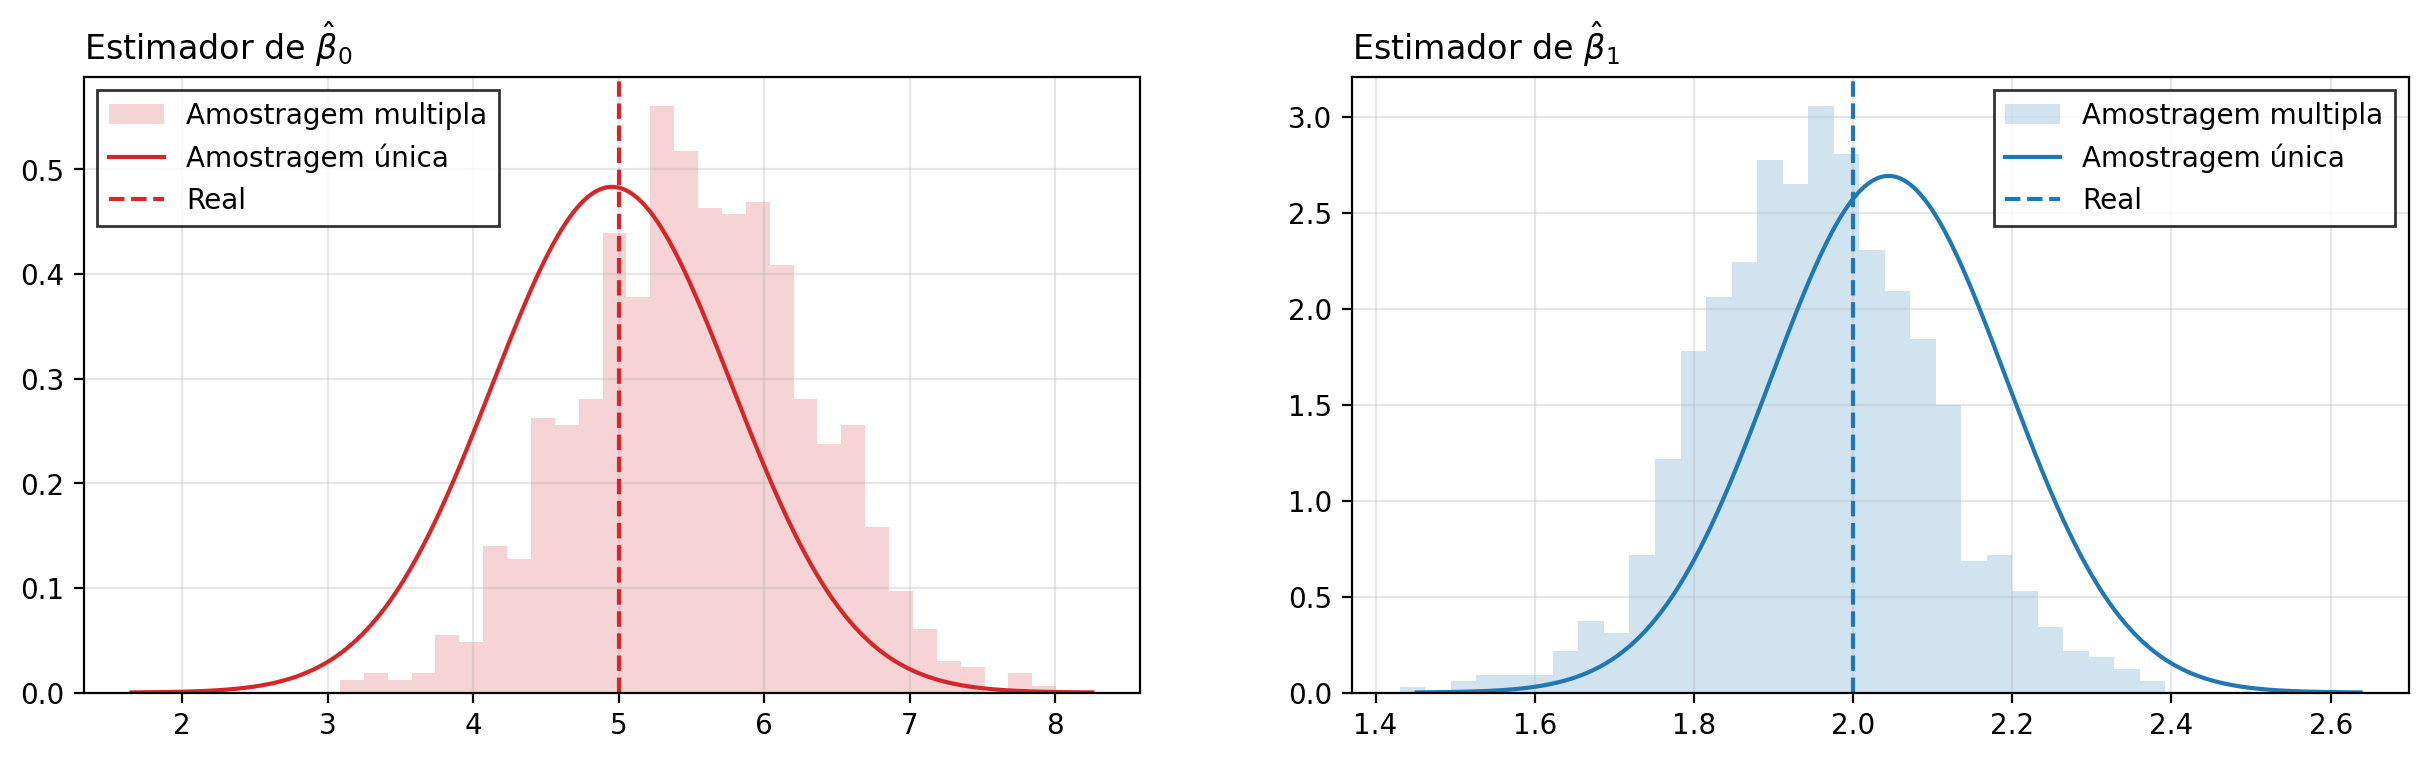

In [78]:
fig, axs = plt.subplots(1,2,figsize=(15,4))

axs[0].hist(beta_0_amostras,bins=30,density=True,alpha=0.2,color='tab:red',label='Amostragem multipla')
axs[0].plot(b0_pontos,pdf_b0,color='tab:red',label='Amostragem única')
axs[0].axvline(b0,ls='--',color='tab:red',label='Real')
axs[0].set_title(f'Estimador de {b0_latex}',loc='left')
    
axs[1].hist(beta_1_amostras,bins=30,density=True,alpha=0.2,color='tab:blue',label='Amostragem multipla')
axs[1].plot(b1_pontos,pdf_b1,color='tab:blue',label='Amostragem única')
axs[1].axvline(b1,ls='--',color='tab:blue',label='Real')
axs[1].set_title(f'Estimador de {b1_latex}',loc='left')

for ax in axs:
    ax.grid(alpha=0.3)
    ax.legend(fancybox=False,edgecolor='k')

plt.show()

In [39]:
coeficientes

,$\hat\beta_0$,$\text{SE}\hat\beta_0$,$\hat\beta_1$,$\text{SE}\hat\beta_1$
Amostragem simples,4.953724,0.825434,2.044667,0.148242
Amostragem multipla,5.530665,0.776845,1.953536,0.141995


A partir dos resultados experimentais acima, concluimos que a suposição da distribuição dos erros nós dá uma informação mais forte do que realizar multiplas amostragens. Note que as estimativas obtidas para amostragem única foram mais próximas dos reais valores dos coeficientes.